In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
import logging
import json
from nltk.cluster import KMeansClusterer, \
cosine_distance
from sklearn import metrics
from numpy.random import shuffle
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
# change fileName to test output for different files
file='iPhoneXS_twitter_eda.csv'

nClusters=3
data = pd.read_csv(file)
print(len(data))
print(data['text'][1])
print(len(data['Labels']))

10057
my first selfie on my new iphone xs #selfie #shamelessselfie iphonexs https://t.co/4iymllouj5
10057


In [11]:
EXTRA_STOP_WORDS = ["http", "https", "iphone", "apple", "iphonexr", "xr", "vs", "iphonexsmax",
                        "enter", "chance", "win", "64", "gb", "via", "youtube", "comparison", "new", "appreciated"]
stopwords = ENGLISH_STOP_WORDS.union(EXTRA_STOP_WORDS)

tfidf_vect = TfidfVectorizer(stop_words=stopwords,min_df=5)
dtm = tfidf_vect.fit_transform(data['text'])
print(dtm.shape)
voc_lookup = tfidf_vect.get_feature_names()

(10057, 2357)


In [12]:
km = KMeans(n_clusters=nClusters,n_init=20).fit(dtm)
clusters = km.labels_.tolist()
print(km.labels_)

centroidsskl = km.cluster_centers_
print(centroidsskl)
sorted_centroidsskl = centroidsskl.argsort()[:, ::-1]

[1 1 1 ... 1 1 0]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00038899 0.00201149 0.00022186 ... 0.00043469 0.00051787 0.00133899]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [13]:
km = KMeans(n_clusters=nClusters,n_init=20).fit(dtm)
clusters = km.labels_.tolist()
print(km.labels_)

centroidsskl = km.cluster_centers_
print(centroidsskl)
sorted_centroidsskl = centroidsskl.argsort()[:, ::-1]

[0 0 0 ... 0 0 1]
[[0.00038899 0.00201149 0.00022186 ... 0.00043469 0.00051787 0.00133899]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


label     1.0  2.0  3.0
clusters               
0          24   69   34
1           0    0   19
2           0    0    4
<class 'list'> <class 'pandas.core.series.Series'>
150
150
<class 'int'>
             precision    recall  f1-score   support

          1       0.19      1.00      0.32        24
          2       0.00      0.00      0.00        69
          3       1.00      0.07      0.13        57

avg / total       0.41      0.19      0.10       150



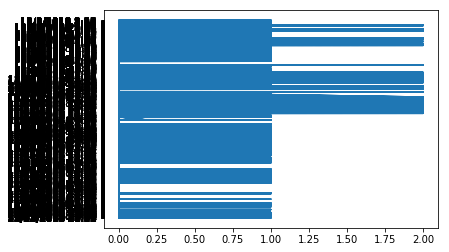

In [16]:
clusters = clusters[0:150]
labels=data['Labels'][0:150]
datum=pd.DataFrame()
datum["label"]=labels
datum["clusters"]=clusters
print(pd.crosstab(index=datum['clusters'], columns=datum['label']))

cluster_dict = {0: 1,
                1: 2,
                2: 3
                }
target = [cluster_dict[i] for i in clusters]
print(type(target),type(labels))
labelList=[]
mylables=labels.tolist()
for i in mylables:
    labelList.append(int(i))

print(len(labelList))
print(len(target))
print(type(target[0]))
# Assign true class to cluster
print(metrics.classification_report(labelList, target))
plt.plot(km.labels_,data['created_at'])
plt.show()